In [1]:
 %matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

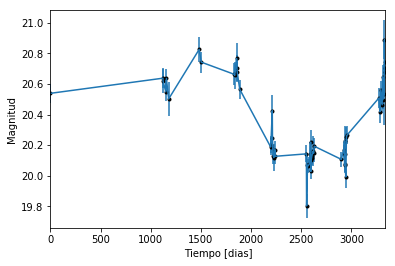

In [2]:
data = np.genfromtxt('LC_15195_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

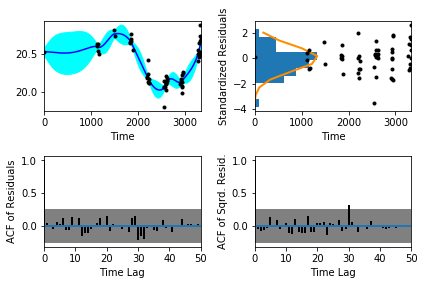

In [5]:
sample.assess_fit()

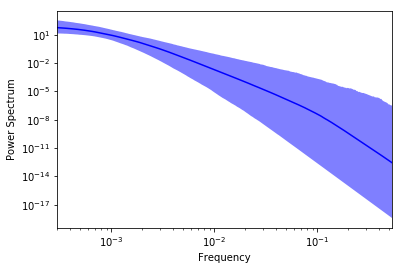

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000374595,0.441328,'Medida del nivel de ruido')

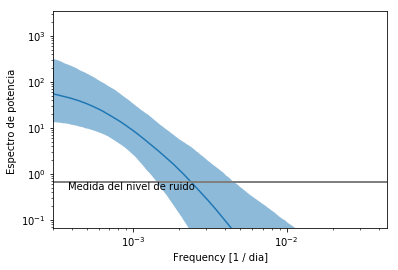

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

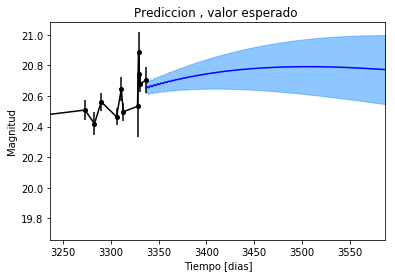

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

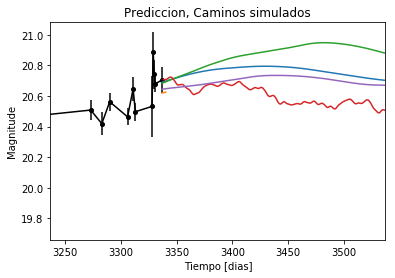

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


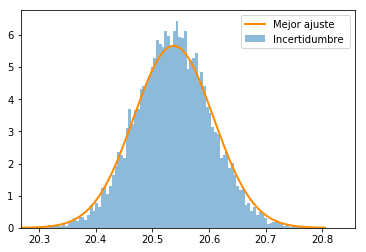

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

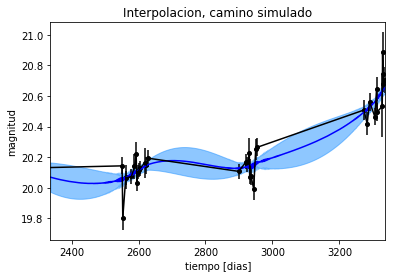

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

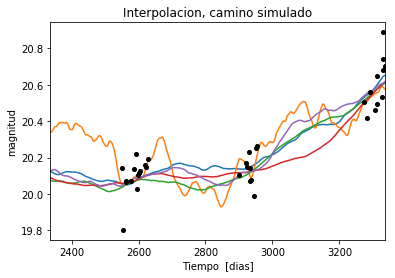

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

Plotting parameter summary


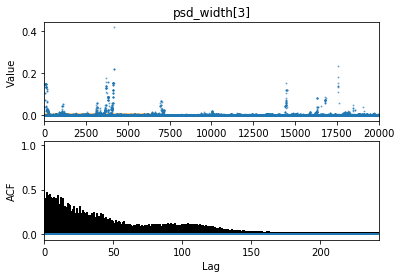

In [15]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [16]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 426.042189519
Median: 0.0113858799674
Standard deviation: 0.209906776405
68% credibility interval: [ 0.00082356  0.22574564]
95% credibility interval: [  3.44705027e-04   8.36157810e-01]
99% credibility interval: [  3.08594638e-04   1.01559921e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 526.173068639
Median: 0.00112311167644
Standard deviation: 0.0932376968262
68% credibility interval: [ 0.00040592  0.01714437]
95% credibility interval: [ 0.00031281  0.30770555]
99% credibility interval: [  3.01988395e-04   6.53165081e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 432.170786536
Median: 0.0108043632926
Standard 

In [18]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 742.254710003
Median: 0.00053888225546
Standard deviation: 0.241255900443
68% credibility interval: [ 0.          0.29120573]
95% credibility interval: [ 0.          0.89375933]
99% credibility interval: [ 0.         1.0237193]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 742.254710003
Median: 0.00053888225546
Standard deviation: 0.241255900443
68% credibility interval: [ 0.          0.29120573]
95% credibility interval: [ 0.          0.89375933]
99% credibility interval: [ 0.         1.0237193]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 777.095721521
Median: 0.0
Standard deviation: 0.000239606910634
68% cred

Plotting parameter summary


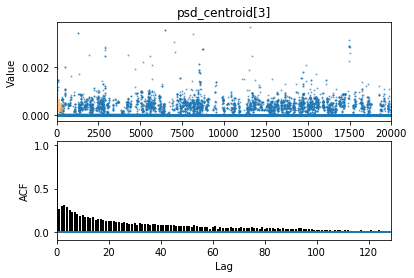

In [20]:
sample.plot_parameter('psd_centroid', 3, doShow=True)

In [21]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [22]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1840.95845487
Median: 71.9626301817
Standard deviation: 1.50295905352
68% credibility interval: [ 70.26864761  72.99014139]
95% credibility interval: [ 67.86665259  73.55444352]
99% credibility interval: [ 65.87959979  73.80903836]


In [23]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [24]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 687.976000318
Median: 0.587588340375
Standard deviation: 2.22186311698
68% credibility interval: [ 0.04848349  3.75912425]
95% credibility interval: [ 0.01385739  7.29150219]
99% credibility interval: [  9.54245179e-03   1.05806244e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 578.002517706
Median: 0.242108441348
Standard deviation: 9.16301401021
68% credibility interval: [ 0.00994433  6.69511593]
95% credibility interval: [  6.7

Plotting parameter summary


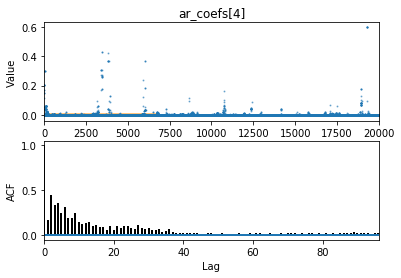

In [25]:
sample.plot_parameter('ar_coefs', 4, doShow=True)

In [26]:
 centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [27]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 7089.9692151
Median: 2.33244944141e-26
Standard deviation: 5.99826090008e+61
68% credibility interval: [  4.31629927e-57   7.79631151e-06]
95% credibility interval: [  1.44168136e-129   1.10782102e+001]
99% credibility interval: [  5.09157414e-190   6.58418676e+004]


In [28]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [29]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2392.72126896
Median: 20.4934944287
Standard deviation: 0.183616256233
68% credibility interval: [ 20.35311317  20.65634953]
95% credibility interval: [ 20.17327782  20.89510571]
99% credibility interval: [ 19.97384038  21.13369486]


Plotting parameter summary


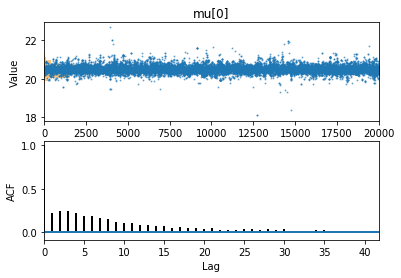

In [30]:
sample.plot_parameter('mu', 0, doShow=True)

In [31]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

Plotting parameter summary


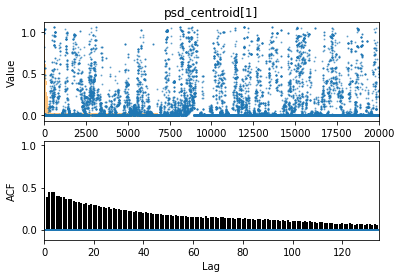

In [32]:
sample.plot_parameter('psd_centroid', 1, doShow=True)

In [33]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [34]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1840.95845487
Median: 71.9626301817
Standard deviation: 1.50295905352
68% credibility interval: [ 70.26864761  72.99014139]
95% credibility interval: [ 67.86665259  73.55444352]
99% credibility interval: [ 65.87959979  73.80903836]


Plotting parameter summary


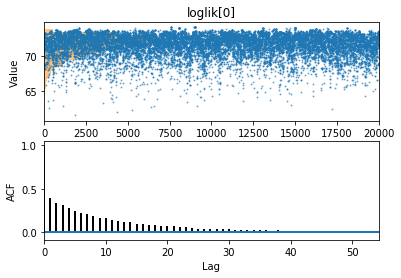

In [35]:
sample.plot_parameter('loglik', 0, doShow=True)

In [36]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [37]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2069.11931518
Median: 0.0926170112243
Standard deviation: 0.151240228485
68% credibility interval: [ 0.050816    0.19464721]
95% credibility interval: [ 0.0313185  0.4717225]
99% credibility interval: [ 0.02408123  0.82037032]


Plotting parameter summary


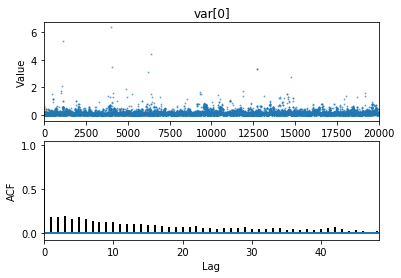

In [38]:
sample.plot_parameter('var', 0, doShow=True)

In [39]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [40]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1711.97602014
Median: 1.18236918433
Standard deviation: 0.178029069181
68% credibility interval: [ 1.02226206  1.37356716]
95% credibility interval: [ 0.88992701  1.58571559]
99% credibility interval: [ 0.81796376  1.72887294]


Plotting parameter summary


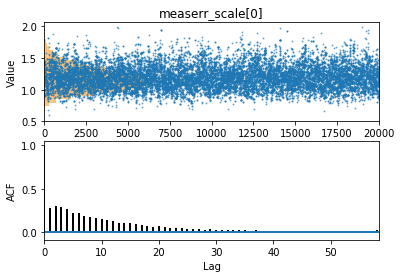

In [41]:
sample.plot_parameter('measerr_scale', 0, doShow=True)

In [42]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [43]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1047.01579912
Median: 5.93029055523e-05
Standard deviation: 0.0924720380815
68% credibility interval: [  1.32024070e-06   2.15906949e-03]
95% credibility interval: [  5.48410014e-08   4.09929334e-02]
99% credibility interval: [  3.36232848e-09   3.61035943e-01]


Plotting parameter summary


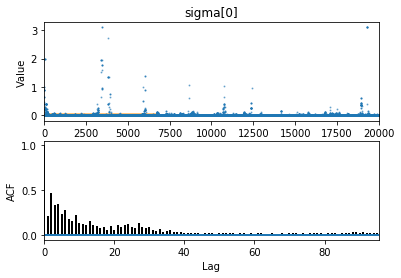

In [44]:
sample.plot_parameter('sigma', 0, doShow=True)

In [45]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [46]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 426.042189519
Median: (-0.0715395937205+0j)
Standard deviation: 2.00929609805
68% credibility interval: [-1.41840166-5.21264186j -0.00517459-2.92174269j]
95% credibility interval: [ -5.25373447e+00+0.j          -2.16584556e-03-5.16068332j]
99% credibility interval: [ -6.38119805e+00+0.j          -1.93895730e-03-0.00151143j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 526.173068639
Median: (-0.00705671878371+0.0505432847001j)
Standard deviation: 1.62511982739
68% credibility interval: [-0.10772128+0.33962168j -0.00255048+4.60201049j]
95% credibility interval: [-1.93337096+0.12960825j -0.00196543+0.j        ]
99% credibility interval: [ -4.10395724e+00+4.09869677j  -1.89744905e-03+0.j        ]
Posterior summary for p